#Importando archivo

In [236]:
import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

In [237]:
df = pd.json_normalize(data)

In [238]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#Corroborando contenido de registros

In [239]:
columnas = df.columns

for i in range(len(columnas)):
  print(f'{i}: en {columnas[i]} hay {len(df[columnas[i]].unique())} valores distintos')
  if len(df[columnas[i]].unique()) < 10:
    print(df[columnas[i]].unique())

0: en customerID hay 7267 valores distintos
1: en Churn hay 3 valores distintos
['No' 'Yes' '']
2: en customer.gender hay 2 valores distintos
['Female' 'Male']
3: en customer.SeniorCitizen hay 2 valores distintos
[0 1]
4: en customer.Partner hay 2 valores distintos
['Yes' 'No']
5: en customer.Dependents hay 2 valores distintos
['Yes' 'No']
6: en customer.tenure hay 73 valores distintos
7: en phone.PhoneService hay 2 valores distintos
['Yes' 'No']
8: en phone.MultipleLines hay 3 valores distintos
['No' 'Yes' 'No phone service']
9: en internet.InternetService hay 3 valores distintos
['DSL' 'Fiber optic' 'No']
10: en internet.OnlineSecurity hay 3 valores distintos
['No' 'Yes' 'No internet service']
11: en internet.OnlineBackup hay 3 valores distintos
['Yes' 'No' 'No internet service']
12: en internet.DeviceProtection hay 3 valores distintos
['No' 'Yes' 'No internet service']
13: en internet.TechSupport hay 3 valores distintos
['Yes' 'No' 'No internet service']
14: en internet.StreamingTV 

In [240]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [241]:
for i in range(len(columnas)):

  revision = df.groupby(df[columnas[i]] == '').value_counts()
  if len(revision.loc[False]) < 7267:
    print(f'Hay {len(revision.loc[True])} espacios sin contenido en {columnas[i]}')
  else:
    print('no hay espacios')

no hay espacios
Hay 224 espacios sin contenido en Churn
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios


In [242]:
for i in range(len(columnas)):
  revision = df.groupby(df[columnas[i]] == ' ').value_counts()
  if len(revision.loc[False]) < 7267:
    print(f'Hay {len(revision.loc[True])} espacios en blanco ¨ ¨ en {columnas[i]}')
  else:
    print('no hay espacios')

no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
no hay espacios
Hay 11 espacios en blanco ¨ ¨ en account.Charges.Total


##Borrando datos inconsistentes

In [243]:
df = df.drop(df[df['Churn'] == ''].index)

In [244]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##Cambiando type de registro: account.Charges.Total

In [245]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [246]:
"""
for i in range(len(columnas)):

  revision = df.groupby(df[columnas[i]] == '').value_counts()
  if len(revision.loc[False]) < 7267:
    print(f'Hay {len(revision.loc[True])} espacios sin contenido en {columnas[i]}')
  else:
    print('no hay espacios')
"""

"\nfor i in range(len(columnas)):\n\n  revision = df.groupby(df[columnas[i]] == '').value_counts()\n  if len(revision.loc[False]) < 7267:\n    print(f'Hay {len(revision.loc[True])} espacios sin contenido en {columnas[i]}')\n  else:\n    print('no hay espacios')\n"

In [247]:
"""
for i in range(len(columnas)):
  revision = df.groupby(df[columnas[i]] == ' ').value_counts()
  if len(revision.loc[False]) < 7267:
    print(f'Hay {len(revision.loc[True])} espacios en blanco ¨ ¨ en {columnas[i]}')
  else:
    print('no hay espacios')
"""

"\nfor i in range(len(columnas)):\n  revision = df.groupby(df[columnas[i]] == ' ').value_counts()\n  if len(revision.loc[False]) < 7267:\n    print(f'Hay {len(revision.loc[True])} espacios en blanco ¨ ¨ en {columnas[i]}')\n  else:\n    print('no hay espacios')\n"

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [249]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##Agregando columna: costo diario

In [250]:
df['Costo_diario'] = df['account.Charges.Monthly'] / 30

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [252]:
df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Costo_diario
4680,6408-WHTEF,No,Male,0,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,2.980000
1354,1958-RNRKS,No,Male,0,Yes,No,30,Yes,Yes,DSL,...,No,No,No,No,Month-to-month,No,Electronic check,49.90,1441.95,1.663333
3138,4373-VVHQL,No,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,1.491667
3957,5402-HTOTQ,No,Male,0,No,No,16,Yes,Yes,DSL,...,No,No,No,No,Month-to-month,No,Electronic check,55.30,875.35,1.843333
4333,5949-HGVJL,No,Female,0,Yes,No,26,Yes,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,73.05,1959.50,2.435000


#Haciendo gráfica con Plotly

In [253]:
import plotly.express as px
import matplotlib.pyplot as plt

In [254]:
fig = px.histogram(df, x='Churn', text_auto=True, color='Churn',
             title='Distribución de Churn', color_discrete_map={'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title='Churn', yaxis_title='Count', font_family='Arial',
                  font_size=15, font_color='blue', title_x=0.5, title_font_size=25)
fig.show()

In [255]:
fig = px.histogram(df, x='customer.gender', text_auto=True, color='Churn', barmode='group',
             title='Distribución de Género', color_discrete_map={'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title='Gender', yaxis_title='Count', font_family='Arial',
                  font_size=15, font_color='blue', title_x=0.5, title_font_size=25)
fig.show()

In [256]:
fig = px.histogram(df, x='customer.SeniorCitizen', text_auto=True, color='Churn', barmode='group',
                   color_discrete_map={'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title='SeniorCitizen', yaxis_title='Count', font_family='Arial',
                  font_size=15, font_color='blue')
fig.show()

In [257]:
fig = px.histogram(df, x='customer.tenure', text_auto=True, color='Churn', barmode='group',
                   color_discrete_map={'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title='Tenure', yaxis_title='Count', font_family='Arial',
                  font_size=15, font_color='blue')
fig.show()

In [258]:
df_grupo = df.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

df_grupo['churn_rate'] = (df_grupo.get('Yes', 0) / df_grupo.sum(axis=1)) * 100

print(df_grupo[['churn_rate']])

#df_grupo['churn_rate'] = df_grupo.get('yes', 0) / (df_grupo.sum(axis=1) * 100)

#print(df_grupo[['churn_rate']])

Churn            churn_rate
customer.tenure            
0                  0.000000
1                 61.990212
2                 51.680672
3                 47.000000
4                 47.159091
...                     ...
68                 9.000000
69                 8.421053
70                 9.243697
71                 3.529412
72                 1.657459

[73 rows x 1 columns]


In [259]:
df_grupo

Churn,No,Yes,churn_rate
customer.tenure,,,
0,11,0,0.000000
1,233,380,61.990212
2,115,123,51.680672
3,106,94,47.000000
4,93,83,47.159091
...,...,...,...
68,91,9,9.000000
69,87,8,8.421053
70,108,11,9.243697


In [260]:
fig = px.line(df_grupo, x=df_grupo.index, y='churn_rate', markers=True, title='Tasa de Churn por Tenure')
fig.update_traces(line_color='#8da0cb')
fig.update_layout(xaxis_title='Tenure', yaxis_title='Churn_rate', font_family='Arial',
                  font_size=15, font_color='blue')
fig.show()

In [261]:
fig = px.scatter(df, x='customer.tenure', y='account.Charges.Monthly', color='Churn',
                 color_discrete_map={'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title='Tenure', yaxis_title='Monthly Charges', font_family='Arial',
                  font_size=15, font_color='blue')
fig.show()

In [262]:
#px.histogram(df, x='account.Charges.Monthly', color='Churn', color_discrete_map={'Yes': '#8da0cb', 'No': '#e78ac3'})

In [263]:
fig = px.histogram(df, x='account.Contract', text_auto=True, color='Churn', barmode='group',
             color_discrete_map={'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title='Contract', yaxis_title='Count', font_family='Arial',
                  font_size=15, font_color='blue')
fig.show()

In [264]:
fig = px.box(df, x='Churn', y='account.Charges.Monthly', color='Churn',
             color_discrete_map={'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title='Churn', yaxis_title='Monthly Charges', font_family='Arial',
                  font_size=15, font_color='blue')
fig.show()

In [265]:
fig = px.histogram(df, x = 'phone.PhoneService',  text_auto = True, color = 'Churn', barmode = 'group',
             color_discrete_map = {'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title = 'PhoneService', yaxis_title = 'Count', font_family = 'Arial',
                  font_size = 15, font_color = 'blue')
fig.show()

In [266]:
fig = px.histogram(df, x = 'internet.InternetService',  text_auto = True, color = 'Churn', barmode = 'group',
             color_discrete_map = {'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title = 'InternetService', yaxis_title = 'Count', font_family = 'Arial',
                  font_size = 15, font_color = 'blue')
fig.show()

In [267]:
fig = px.histogram(df, x = 'internet.StreamingTV',  text_auto = True, color = 'Churn', barmode = 'group',
                   color_discrete_map = {'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title = 'StreamingTV', yaxis_title = 'Count', font_family = 'Arial',
                  font_size = 15, font_color = 'blue')
fig.show()

In [268]:
fig = px.histogram(df, x = 'internet.StreamingMovies',  text_auto = True, color = 'Churn', barmode = 'group',
                   color_discrete_map = {'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title = 'StreamingMovies', yaxis_title = 'Count', font_family = 'Arial',
                  font_size = 15, font_color = 'blue')
fig.show()

In [269]:
fig = px.histogram(df, x = 'account.PaymentMethod',  text_auto = True, color = 'Churn', barmode = 'group',
                   color_discrete_map = {'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title = 'PaymentMethod', yaxis_title = 'Count', font_family = 'Arial',
                  font_size = 15, font_color = 'blue')
fig.show()

#Extra

##Gráfica

In [270]:
fig = px.histogram(df, x = 'Costo_diario',  text_auto = True, color = 'Churn', barmode = 'group',
                   color_discrete_map = {'Yes': '#8da0cb', 'No': '#e78ac3'})
fig.update_layout(xaxis_title = 'Costo_diario', yaxis_title = 'Count', font_family = 'Arial',
                  font_size = 15, font_color = 'blue')
fig.show()

##Cambiar valores "Yes" y "No" por representación binaria

In [278]:
df_binario = df.copy()

In [279]:
def cambiar_a_binario(dataframe: pd.DataFrame, columna: str):
  df_binario[columna] = dataframe[columna].str.lower().apply(lambda x: 0 if x == 'no' else 1 if x == 'yes' else 0)

In [280]:
df_binario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [281]:
df_binario.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Costo_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [282]:
columnas = df.columns
columnas = columnas.delete([0, 2, 3, 6, 9, 16, 18, 19, 20, 21])

In [284]:
for i in range(len(columnas)):
  cambiar_a_binario(df, columnas[i])

In [286]:
df_binario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   int64  
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64  
 1

##Segunda gráfica: Correlación

In [292]:
df_efimero = df_binario.groupby(['customerID','customer.tenure', 'Churn', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
                         'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'])

In [293]:
df_efimero = pd.DataFrame(df_efimero.size())
df_efimero.reset_index(inplace=True)

In [296]:
df_efimero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerID                 7043 non-null   object
 1   customer.tenure            7043 non-null   int64 
 2   Churn                      7043 non-null   int64 
 3   phone.PhoneService         7043 non-null   int64 
 4   phone.MultipleLines        7043 non-null   int64 
 5   internet.OnlineSecurity    7043 non-null   int64 
 6   internet.OnlineBackup      7043 non-null   int64 
 7   internet.DeviceProtection  7043 non-null   int64 
 8   internet.TechSupport       7043 non-null   int64 
 9   internet.StreamingTV       7043 non-null   int64 
 10  internet.StreamingMovies   7043 non-null   int64 
 11  0                          7043 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 660.4+ KB


In [294]:
df_efimero.head(5)

,customerID,customer.tenure,Churn,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,0
0,0002-ORFBO,9,0,1,0,0,1,0,1,1,0,1
1,0003-MKNFE,9,0,1,1,0,0,0,0,0,1,1
2,0004-TLHLJ,4,1,1,0,0,0,1,0,0,0,1
3,0011-IGKFF,13,1,1,0,0,1,1,0,1,1,1
4,0013-EXCHZ,3,1,1,0,0,0,0,1,1,0,1


In [299]:
bool_cols = df_efimero.columns[df_efimero.nunique() == 2]

correlaciones = df_binario[bool_cols].corr()['Churn'].drop('Churn').sort_values(ascending=False)

In [300]:
correlaciones

,Churn
internet.StreamingTV,0.063228
internet.StreamingMovies,0.061382
phone.MultipleLines,0.040102
phone.PhoneService,0.011942
internet.DeviceProtection,-0.066160
internet.OnlineBackup,-0.082255
internet.TechSupport,-0.164674
internet.OnlineSecurity,-0.171226


In [314]:
fig = px.bar(x=correlaciones.values, y=correlaciones.index, orientation='h',
             title='Correlación con Churn',
             labels={'x': 'Correlación', 'y': 'Servicios'},
             color=correlaciones.values > 0,
             color_discrete_map={True: '#8da0cb', False: '#e78ac3'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_title='Correlación', yaxis_title='Servicios', font_family='Arial',
                  font_size=15, font_color='blue')
fig.show()

##borrador

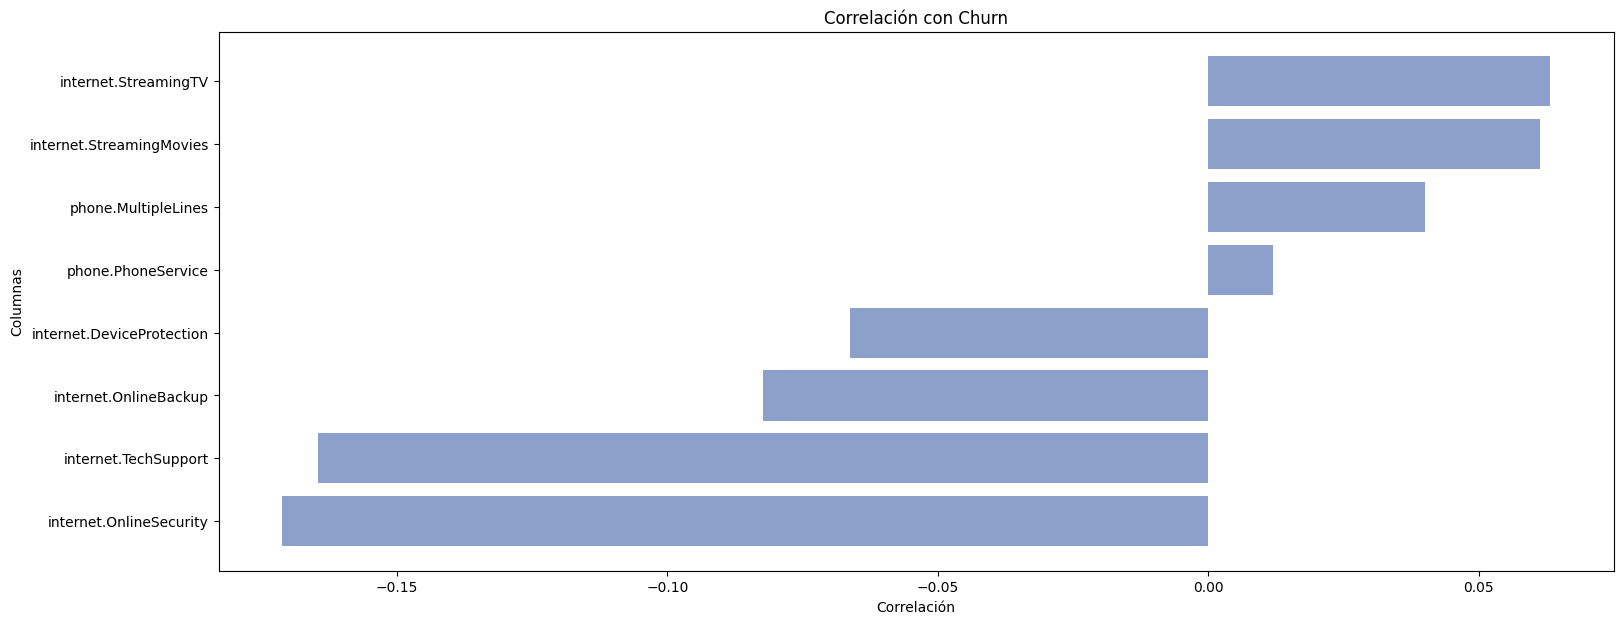

In [306]:
plt.figure(figsize=(18, 7))
plt.barh(y=correlaciones.index, width=correlaciones.values, color='#8da0cb')
plt.xlabel('Correlación')
plt.ylabel('Columnas')
plt.title('Correlación con Churn')
plt.gca().invert_yaxis()
plt.show()

#Informe final:

**Introducción:**

La empresa de telecomunicaciones, **Telecom X**, nos ha contactado para realizar un análisis sobre la Evasión de clientes.

En los últimos meses la empresa centro su atención en el problema de **'Churn'** o **pérdida de clientes**.

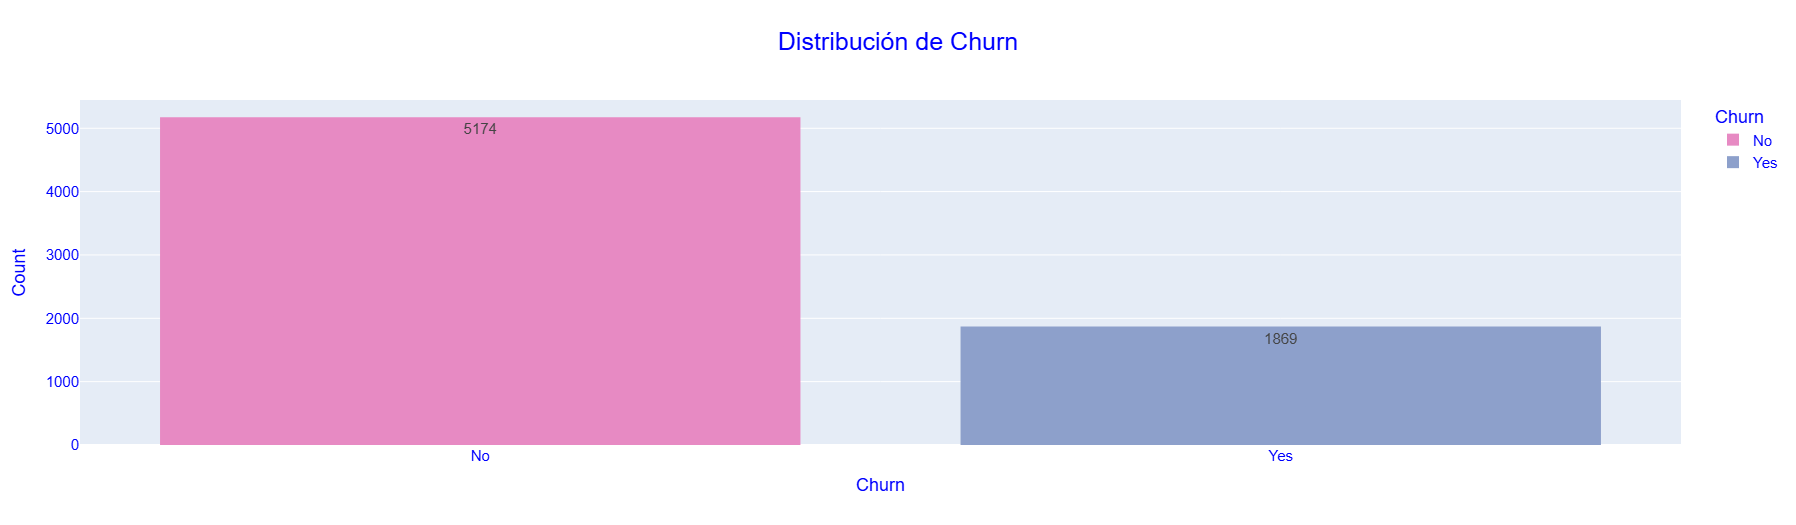


**Tratamiento de datos:**

Tras haber importado los datos proporcionados por el cliente, se hizo la normalización y posterior limpieza de registros inconsistentes para asegurar la calidad en el análisis realizado.

**Presentación de datos**

El análisis arrojo datos bastante concisos acerca de esta **pérdida de usuarios**, primero se realizo una comparativa entre usuarios de distinto **genero** pero no se encontró ningún comportamiento anómalo

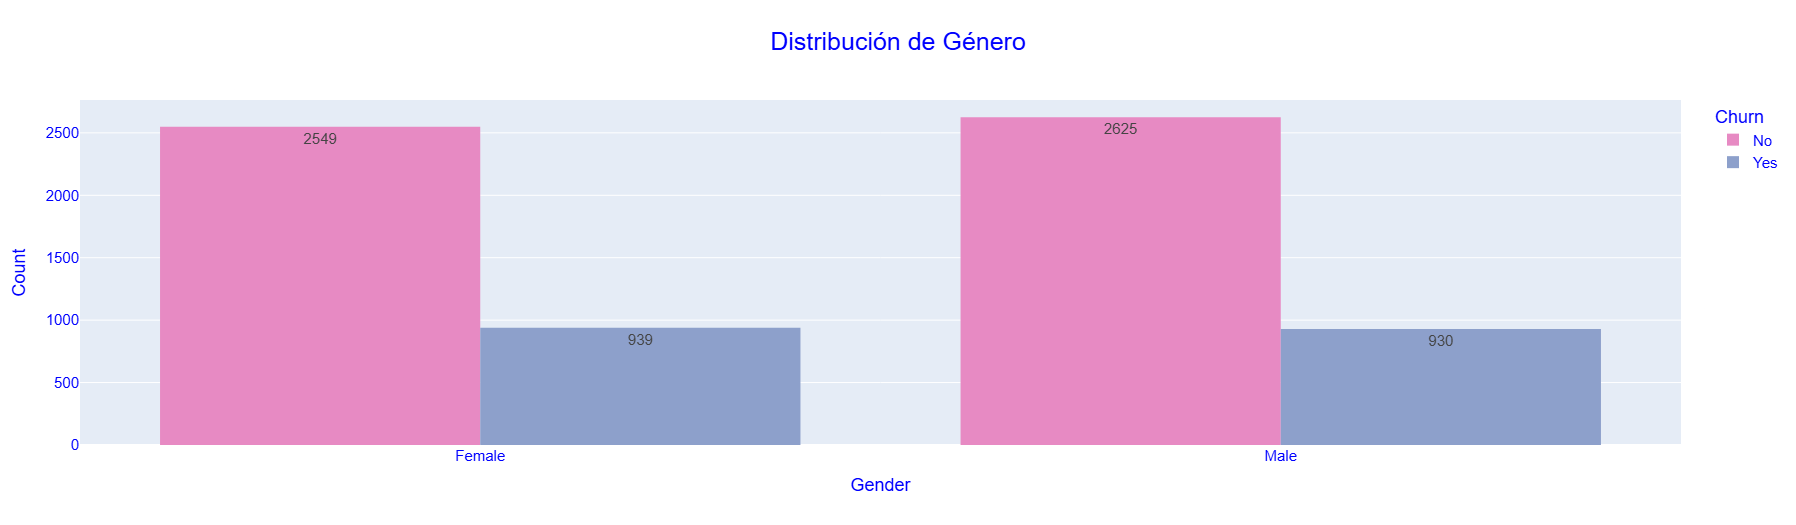

Como se puede apreciar en la gráfica, los registros comparados son bastante semejantes.

Así que el equipo de **DataScience** optó por realizar otra comparación, esta vez entre personas mayores de 60 años.

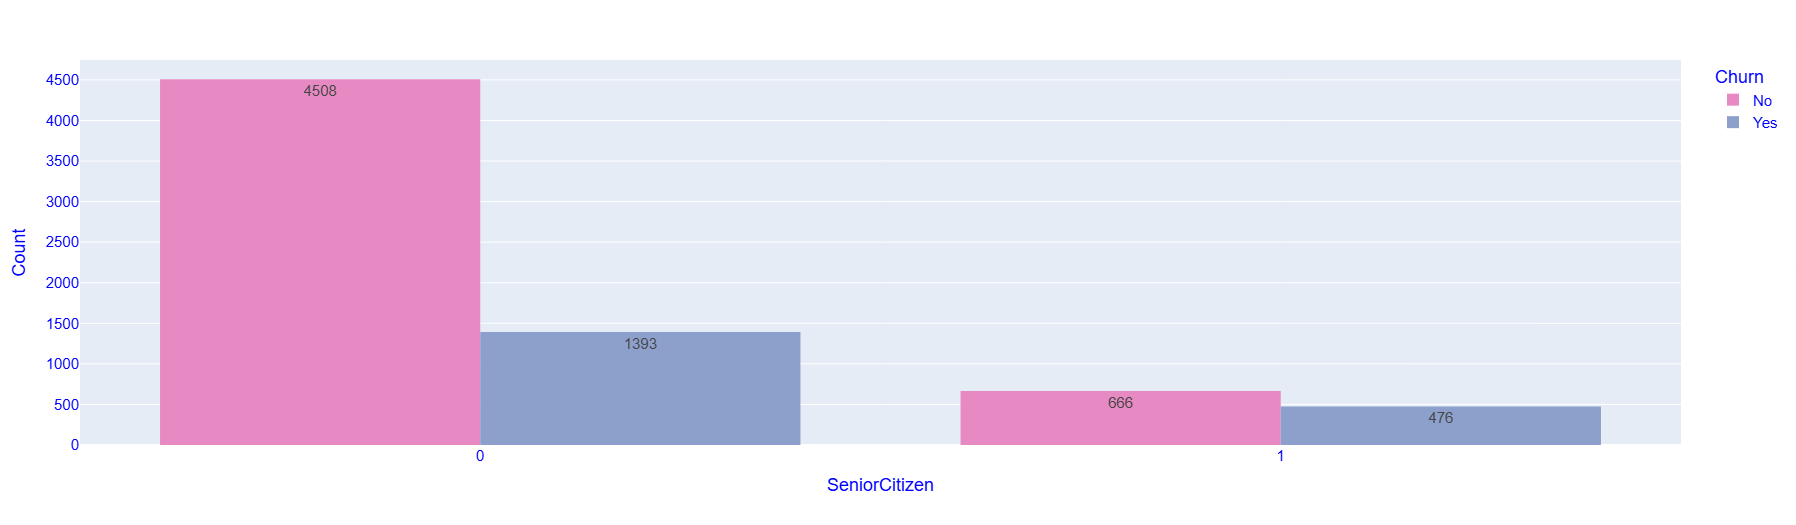

este nuevo resultado deja ver algo interesante, pues si bien las personas menores de 60 años abandonan el servicio más que lo que lo hacen los mayores, la proporción cambia completamente.

En este contexto, se hace la **sugerencia** de corroborar la accesibilidad que la empresa proporciona para personas de la **tercera edad**.

Más adelante, el equipo de DS(DataScience), decidió realizar una gráfica de **'Churn'** sobre **'Tenure'**

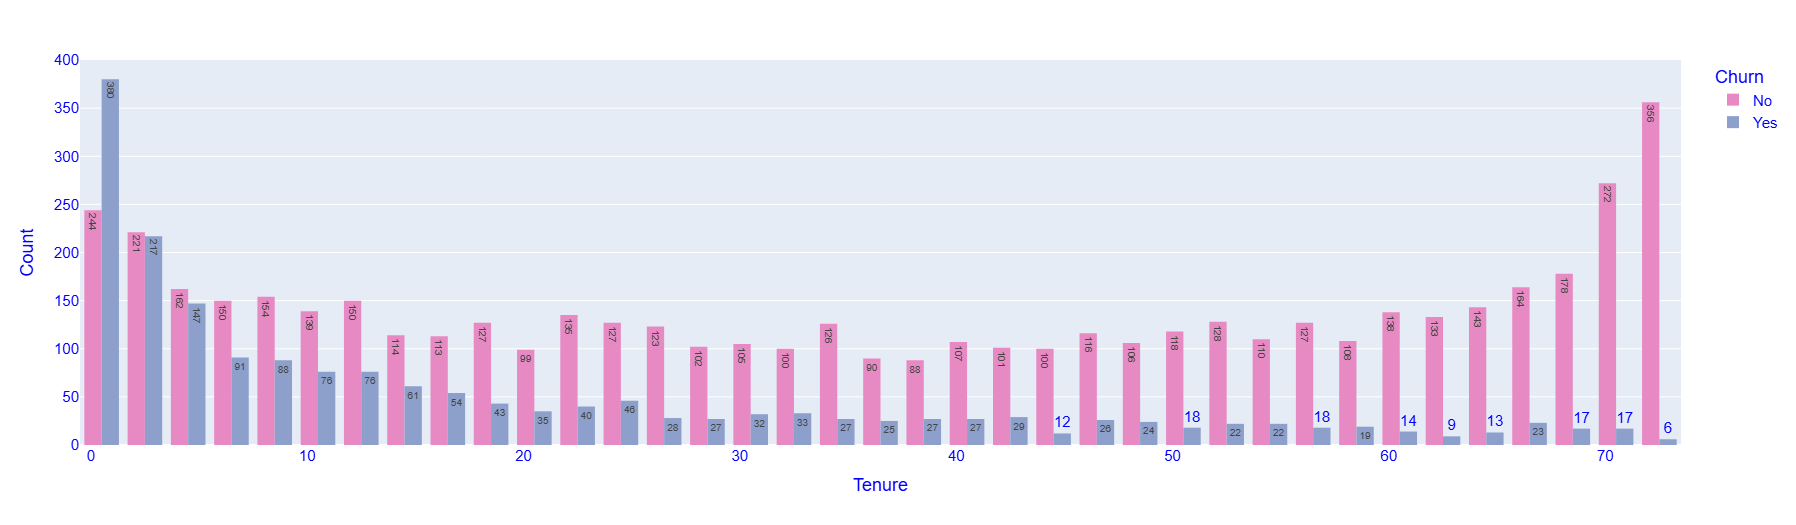

En esta ocasión, se puede apreciar que gran parte del **'Churn'** radica en los primeros meses posteriores a la contratación del servicio.

DS hace la sugerencia de adoptar nuevas políticas para incentivar a los nuevos usuarios a permanecer inscritos al servicio.

Durante el análisis se hicieron más gráficas pero al no proporcionar mucha información revelante se omitiran del informe, pese a ello, todo en trabajo realizado se encuentra en esta misma notebook.

Ahora se mostrará en pantalla la gráfica de **'Churn'** sobre el tipo de contrato realizado

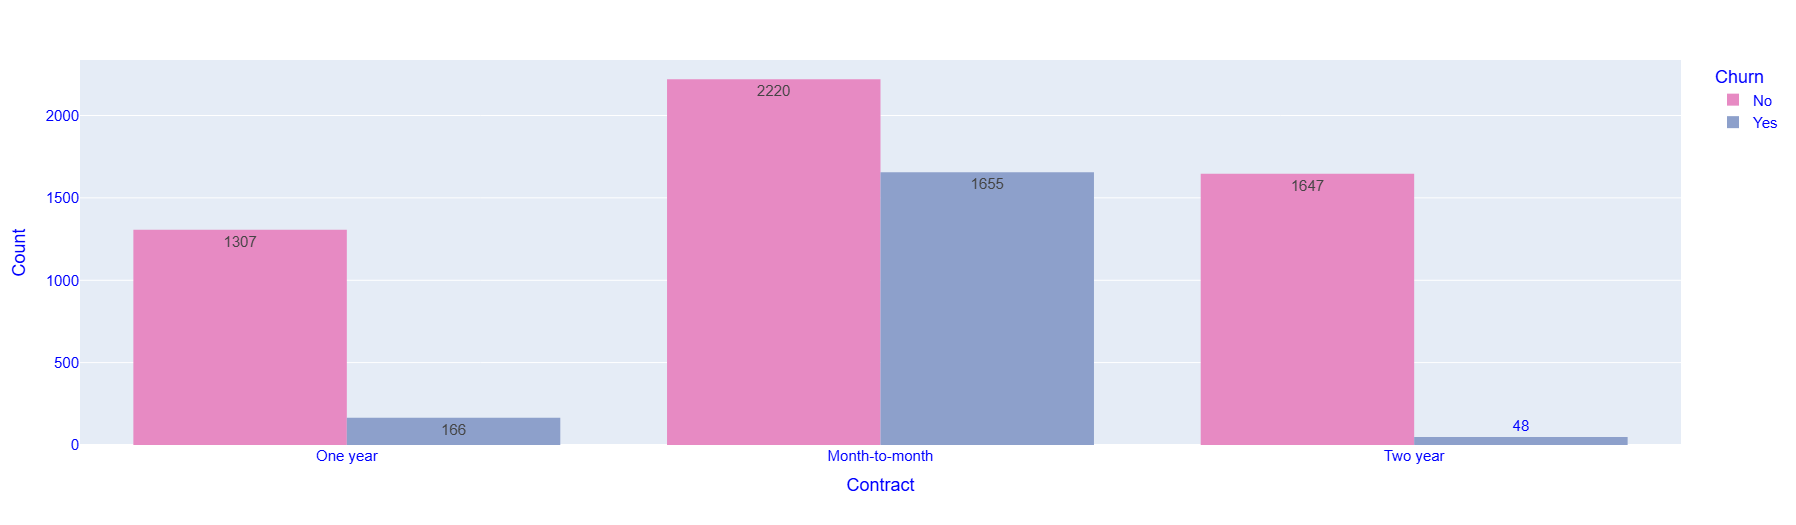

En la gráfica se puede percibir que gran parte del **'Churn'** se centra en los contratos mes a mes.

la sugerencia emitida por el equipo de DS es contemplar la posibilidad de añadir un **cuarto tipo de contrato** con **plazo semestral**.

Para finalizar la etapa de visualización de datos, a continuación se presentará la gráfica de **'Churn'** con respecto al **método de pago**.

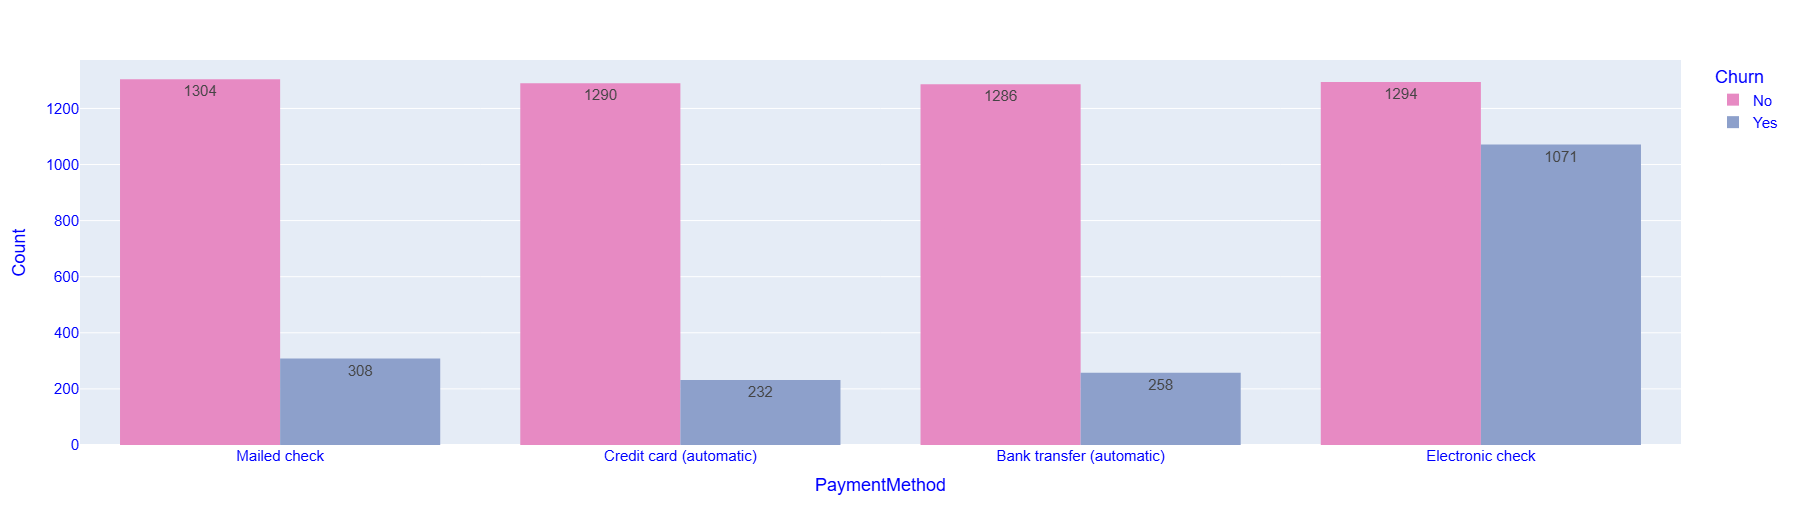

En la visualización previa es notable la existencia de un **problema** con el método de **pago electrónico**, algo que deberá resolverse en la brevedad posible.

**Final del informe**

Esas son todas las observaciones que hizo el equipo de DS, el resto de la documentación será enviada al correo electrónico proporcionado por la empresa

atentamente:Equipo de DataScience